In [1]:
#Adding path to parent directory
import numpy as np
import os
import sys
sys.path.insert(0, os.path.dirname(os.getcwd()))

#Loading black box utilities
from ur_evaluation.blackbox_util import BlackBoxSimulator
dataset_utilities = BlackBoxSimulator().load_breast_cancer_utilities()
[X_train, y_train, X_test, y_test, features, model, mode, categorical_features, sample_idx] = dataset_utilities.values()

assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]

print(f"Prediction model type = {mode}")
print(f"Number of categorical featues = {len(categorical_features)}")

print('X_test', X_test[1])
print('y_test', y_test)

print(features)

print(mode)

print(categorical_features)

print(sample_idx)

print('X Shape ', X_test.shape)

R2 score for the model on test set = 0.9298245614035088
Prediction model type = classification
Number of categorical featues = 0
X_test [1.016e+01 1.959e+01 6.473e+01 3.117e+02 1.003e-01 7.504e-02 5.025e-03
 1.116e-02 1.791e-01 6.331e-02 2.441e-01 2.090e+00 1.648e+00 1.680e+01
 1.291e-02 2.222e-02 4.174e-03 7.082e-03 2.572e-02 2.278e-03 1.065e+01
 2.288e+01 6.788e+01 3.473e+02 1.265e-01 1.200e-01 1.005e-02 2.232e-02
 2.262e-01 6.742e-02]
y_test [1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1
 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0 0]
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'wor

In [2]:
#Default settings
from unravel.tabular import UnRAVELTabularExplainer

# Take first four samples
X_init = np.array(X_test[sample_idx[0]])
print(X_init.shape)

#Initializing the explainer object
f_explain = UnRAVELTabularExplainer(model, X_train, categorical_features = categorical_features, mode = mode)

#explanation = f_explain.explain(X_init = X_init, feature_names = features, alpha = "FUR_w", max_iter = 5, \
#                          normalize=False, importance_method="ARD")

warning in stationary: failed to import cython module: falling back to numpy
warning in coregionalize: failed to import cython module: falling back to numpy
warning in choleskies: failed to import cython module: falling back to numpy
(30,)


In [3]:
from ur_evaluation.explanation_evaluator import UnRAVELEvaluator

Evaluator = UnRAVELEvaluator(kernel_shape = len(features))


In [4]:
Evaluator.evaluate_model(iterations        = 3,
                         unravel_explainer = f_explain,
                         X_init            = X_init,
                         max_iter          = 50,
                         alpha             = "FUR_w",)

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]


generate_scores_singlecore [1.227e+01 2.997e+01 7.742e+01 4.654e+02 7.699e-02 3.398e-02 0.000e+00
 0.000e+00 1.701e-01 5.960e-02 4.455e-01 3.647e+00 2.884e+00 3.513e+01
 7.339e-03 8.243e-03 0.000e+00 0.000e+00 3.141e-02 3.136e-03 1.345e+01
 3.805e+01 8.508e+01 5.589e+02 9.422e-02 5.213e-02 0.000e+00 0.000e+00
 2.409e-01 6.743e-02]
generate_domain 12.27


IndexError: tuple index out of range

warning in stationary: failed to import cython module: falling back to numpy
warning in coregionalize: failed to import cython module: falling back to numpy
warning in choleskies: failed to import cython module: falling back to numpy
mean radius 4.0734183610264996e-27 0.28732542358585167 3.4803742304453755
mean texture 0.28732542358585167 0.679248227658773 1.472215839924664
mean perimeter 0.679248227658773 0.4232817812684485 2.3624924205414652
mean area 0.4232817812684485 0.9275922571569462 1.0780598827603223
mean smoothness 0.9275922571569462 1.4348650762478103 0.6969296392766156
mean compactness 1.4348650762478103 2.546009598362342 0.3927714964795205
mean concavity 2.546009598362342 0.6271548357516422 1.594502574155399
mean concave points 0.6271548357516422 0.18798084010762656 5.319691088876185
mean symmetry 0.18798084010762656 1.6065855508198401 0.6224380640605789
mean fractal dimension 1.6065855508198401 0.6166640566487955 1.6216284851016105
radius error 0.6166640566487955 1.160060

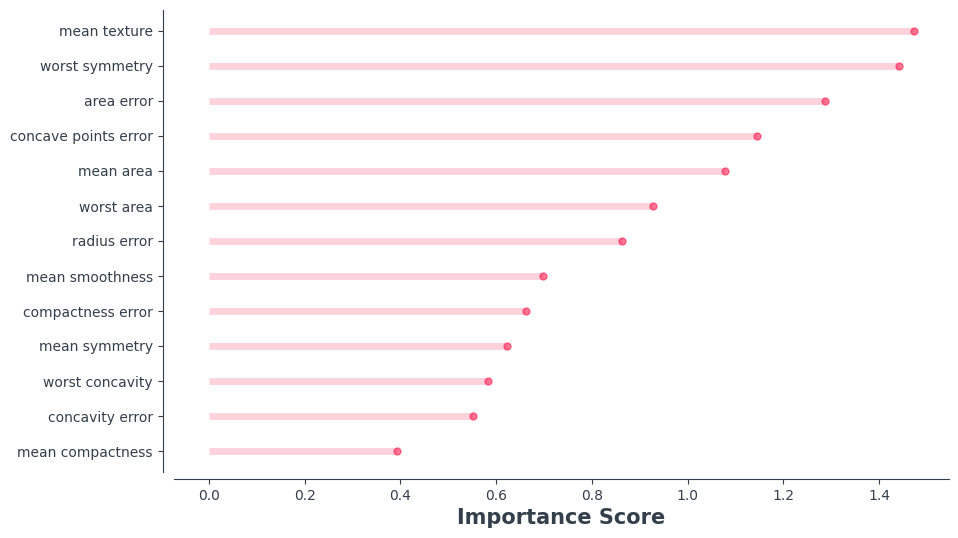

In [2]:
#Default settings
from unravel.tabular import UnRAVELTabularExplainer

#Sample to be explained
sample_idx = sample_idx[0]

#Generating initial starting point
X_init = np.array([X_test[sample_idx]])

#Initializing the explainer object
f_explain = UnRAVELTabularExplainer(model, X_train, categorical_features = categorical_features, mode = mode)

explanation = f_explain.explain(X_init = X_init, feature_names = features, alpha = "FUR", max_iter = 5, \
                          normalize=False, importance_method="ARD")

In [ ]:
import matplotlib.pyplot as plt
plt.stem(explanation)

In [4]:
print(explanation)

[3.48037423 1.47221584 2.36249242 1.07805988 0.69692964 0.3927715
 1.59450257 5.31969109 0.62243806 1.62162849 0.86202389 3.85228519
 2.15339068 1.28632643 2.98993537 0.66144544 0.5515384  1.14549301
 2.20706386 2.51679826 1.84053502 1.92398349 2.50650398 0.92856421
 2.797423   1.525588   0.58220027 2.87453491 1.44103978 2.20522367]


In [5]:
print(features)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
